In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load the main dataset
df = pd.read_csv('postings.csv')

# First look at the data
print("Shape of dataset:")
print(df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
df.head()

Shape of dataset:
(123849, 31)

Column names:
['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips']

First 5 rows:


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [3]:
# Check data types and missing values
print("Data types and missing values:\n")
missing = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing[missing['Missing Count'] > 0].sort_values('Missing %', ascending=False))

print(f"\nTotal rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nJob types available:")
print(df['work_type'].value_counts())

print(f"\nExperience levels available:")
print(df['formatted_experience_level'].value_counts())

Data types and missing values:

                            Missing Count  Missing %
closed_time                        122776      99.13
skills_desc                        121410      98.03
med_salary                         117569      94.93
remote_allowed                     108603      87.69
applies                            100529      81.17
max_salary                          94056      75.94
min_salary                          94056      75.94
pay_period                          87776      70.87
normalized_salary                   87776      70.87
compensation_type                   87776      70.87
currency                            87776      70.87
posting_domain                      39968      32.27
application_url                     36665      29.60
formatted_experience_level          29409      23.75
fips                                27415      22.14
zip_code                            20872      16.85
company_id                           1717       1.39
company_name  

In [4]:
# Keep only useful columns
cols_to_keep = [
    'job_id', 'company_name', 'title', 'location',
    'formatted_experience_level', 'work_type',
    'remote_allowed', 'views', 'applies',
    'min_salary', 'max_salary', 'pay_period',
    'normalized_salary', 'description'
]

df_clean = df[cols_to_keep].copy()

# Rename for readability
df_clean.rename(columns={
    'formatted_experience_level': 'experience_level',
    'normalized_salary': 'annual_salary'
}, inplace=True)

# Fill remote_allowed NaN as 0 (not remote)
df_clean['remote_allowed'] = df_clean['remote_allowed'].fillna(0)

# Drop rows with no company name or title
df_clean.dropna(subset=['company_name', 'title'], inplace=True)

# Extract state from location (e.g., "New York, NY" → "NY")
df_clean['state'] = df_clean['location'].str.extract(r',\s*([A-Z]{2})$')

print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"\nMissing values remaining:")
print(df_clean.isnull().sum())
df_clean.head()

Cleaned dataset shape: (122130, 15)

Missing values remaining:
job_id                  0
company_name            0
title                   0
location                0
experience_level    27948
work_type               0
remote_allowed          0
views                1627
applies             99235
min_salary          92792
max_salary          92792
pay_period          86567
annual_salary       86567
description             6
state               18191
dtype: int64


,job_id,company_name,title,location,experience_level,work_type,remote_allowed,views,applies,min_salary,max_salary,pay_period,annual_salary,description,state
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,"Princeton, NJ",NaN,FULL_TIME,0.0,20.0,2.0,17.0,20.0,HOURLY,38480.0,Job descriptionA leading real estate firm in N...,NJ
2,10998357,The National Exemplar,Assitant Restaurant Manager,"Cincinnati, OH",NaN,FULL_TIME,0.0,8.0,NaN,45000.0,65000.0,YEARLY,55000.0,The National Exemplar is accepting application...,OH
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",NaN,FULL_TIME,0.0,16.0,NaN,140000.0,175000.0,YEARLY,157500.0,Senior Associate Attorney - Elder Law / Trusts...,NY
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,"Raleigh, NC",NaN,INTERNSHIP,0.0,9.0,4.0,14.0,20.0,HOURLY,35360.0,Job summary:The Economic Development & Plannin...,NC
6,103254301,Raw Cereal,Producer,United States,NaN,CONTRACT,1.0,7.0,1.0,60000.0,300000.0,YEARLY,180000.0,Company DescriptionRaw Cereal is a creative de...,NaN


/var/folders/rn/mqjdn7rn0tb8x74jq6b8y_ph0000gn/T/ipykernel_20668/1447006923.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='Blues_d')


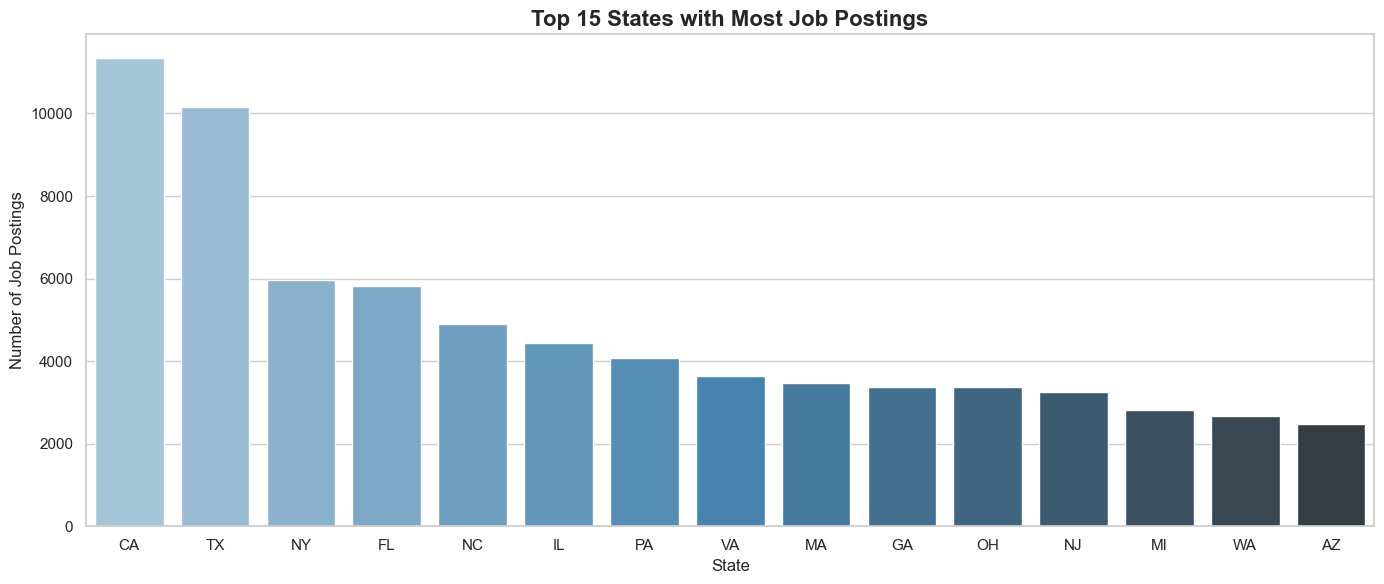

state
CA    11347
TX    10155
NY     5955
FL     5818
NC     4905
IL     4428
PA     4079
VA     3632
MA     3460
GA     3385
OH     3383
NJ     3246
MI     2821
WA     2673
AZ     2479
Name: count, dtype: int64


In [5]:
# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Top 15 states by job postings
top_states = df_clean['state'].value_counts().head(15)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='Blues_d')
plt.title('Top 15 States with Most Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.tight_layout()
plt.savefig('top_states.png', dpi=150)
plt.show()

print(top_states)

/var/folders/rn/mqjdn7rn0tb8x74jq6b8y_ph0000gn/T/ipykernel_20668/3434453893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


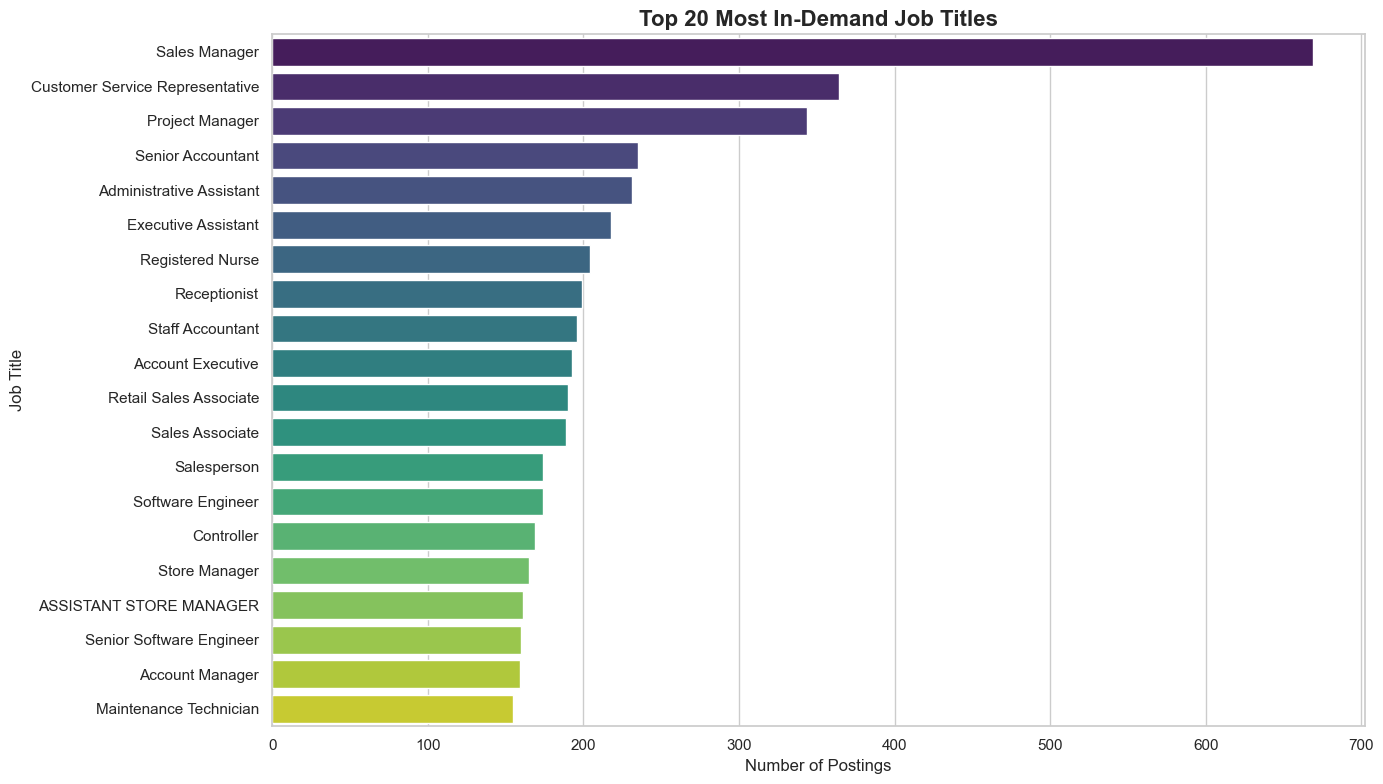

title
Sales Manager                      669
Customer Service Representative    364
Project Manager                    344
Senior Accountant                  235
Administrative Assistant           231
Executive Assistant                218
Registered Nurse                   204
Receptionist                       199
Staff Accountant                   196
Account Executive                  193
Retail Sales Associate             190
Sales Associate                    189
Salesperson                        174
Software Engineer                  174
Controller                         169
Store Manager                      165
ASSISTANT STORE MANAGER            161
Senior Software Engineer           160
Account Manager                    159
Maintenance Technician             155
Name: count, dtype: int64


In [6]:
# Top 20 most common job titles
top_titles = df_clean['title'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 20 Most In-Demand Job Titles', fontsize=16, fontweight='bold')
plt.xlabel('Number of Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.savefig('top_titles.png', dpi=150)
plt.show()

print(top_titles)

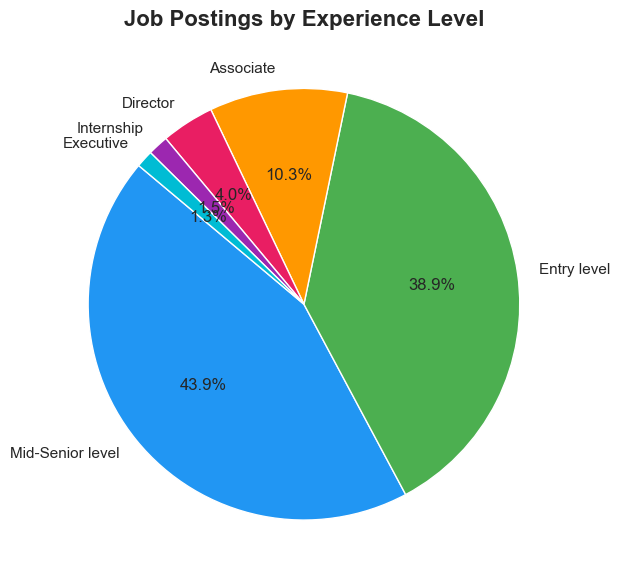

experience_level
Mid-Senior level    41367
Entry level         36681
Associate            9743
Director             3729
Internship           1449
Executive            1213
Name: count, dtype: int64


In [7]:
# Experience level distribution
exp_data = df_clean['experience_level'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#2196F3', '#4CAF50', '#FF9800', '#E91E63', '#9C27B0', '#00BCD4']
plt.pie(exp_data.values, labels=exp_data.index, autopct='%1.1f%%', 
        colors=colors, startangle=140)
plt.title('Job Postings by Experience Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('experience_levels.png', dpi=150)
plt.show()

print(exp_data)

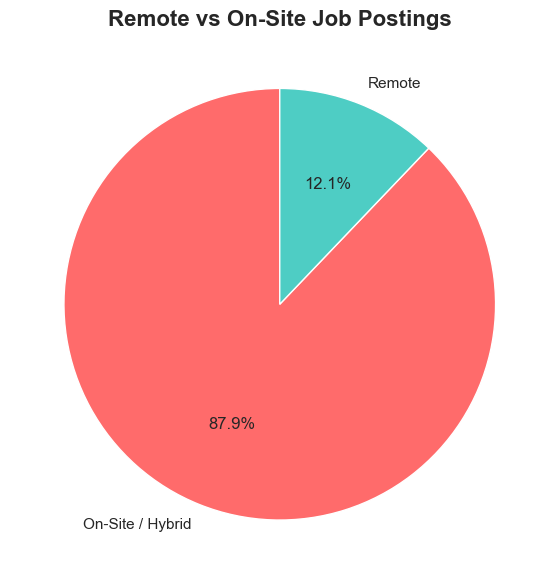

Work Type Breakdown:
work_type
FULL_TIME     97552
CONTRACT      11955
PART_TIME      9488
TEMPORARY      1176
INTERNSHIP      955
VOLUNTEER       555
OTHER           449
Name: count, dtype: int64


In [8]:
# Remote vs On-site
remote_counts = df_clean['remote_allowed'].value_counts()
labels = ['On-Site / Hybrid', 'Remote']

plt.figure(figsize=(8, 6))
plt.pie(remote_counts.values, labels=labels, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
plt.title('Remote vs On-Site Job Postings', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('remote_vs_onsite.png', dpi=150)
plt.show()

# Also show work type breakdown
print("Work Type Breakdown:")
print(df_clean['work_type'].value_counts())

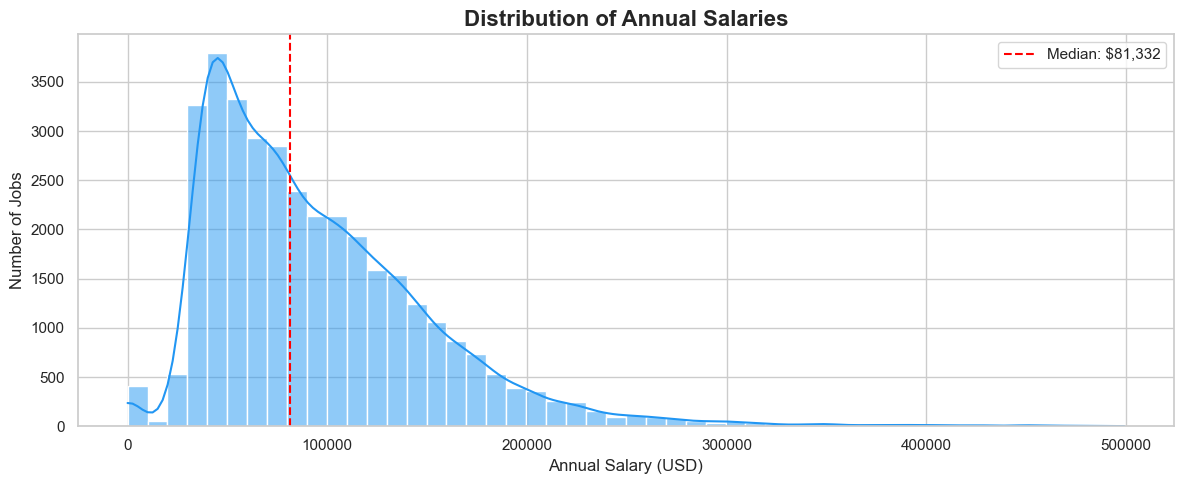

Median Salary: $81,332
Mean Salary: $94,611
Min Salary: $0
Max Salary: $499,000


In [9]:
# Filter rows with valid annual salary
df_salary = df_clean[df_clean['annual_salary'].notna()].copy()
df_salary = df_salary[df_salary['annual_salary'] < 500000]  # remove outliers

plt.figure(figsize=(12, 5))
sns.histplot(df_salary['annual_salary'], bins=50, color='#2196F3', kde=True)
plt.title('Distribution of Annual Salaries', fontsize=16, fontweight='bold')
plt.xlabel('Annual Salary (USD)', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.axvline(df_salary['annual_salary'].median(), color='red', 
            linestyle='--', label=f"Median: ${df_salary['annual_salary'].median():,.0f}")
plt.legend()
plt.tight_layout()
plt.savefig('salary_distribution.png', dpi=150)
plt.show()

print(f"Median Salary: ${df_salary['annual_salary'].median():,.0f}")
print(f"Mean Salary: ${df_salary['annual_salary'].mean():,.0f}")
print(f"Min Salary: ${df_salary['annual_salary'].min():,.0f}")
print(f"Max Salary: ${df_salary['annual_salary'].max():,.0f}")

/var/folders/rn/mqjdn7rn0tb8x74jq6b8y_ph0000gn/T/ipykernel_20668/1226092737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sal_exp, x='experience_level', y='annual_salary',


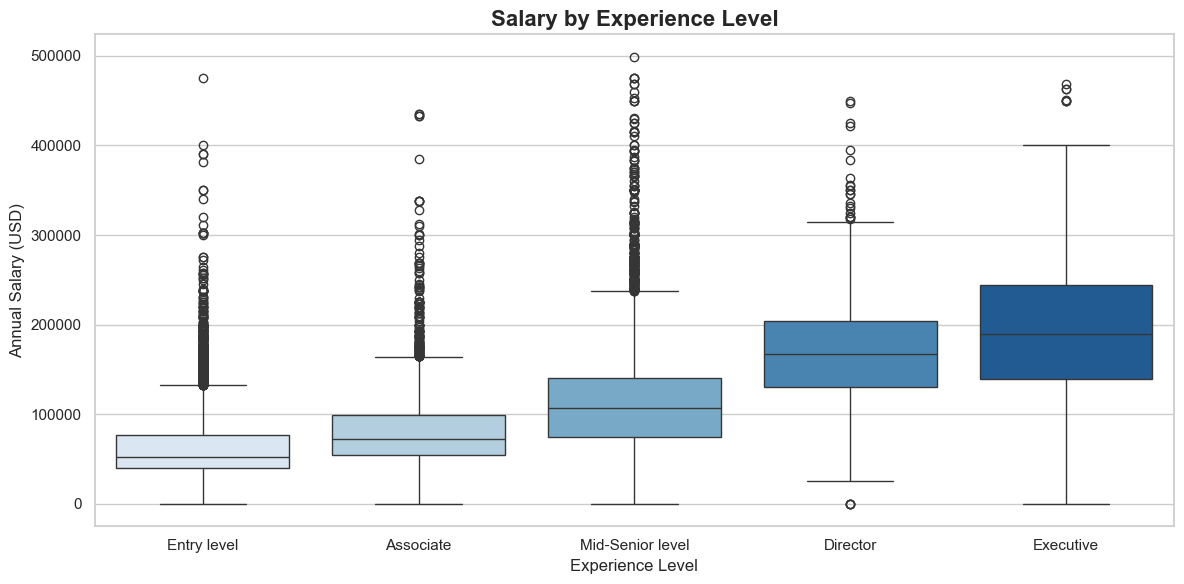

Median Salary by Experience Level:
experience_level
Entry level          52016.65
Associate            72800.00
Mid-Senior level    107500.00
Director            166781.25
Executive           190000.00
Name: annual_salary, dtype: float64


In [10]:
# Salary by experience level
df_sal_exp = df_clean[
    (df_clean['annual_salary'].notna()) & 
    (df_clean['experience_level'].notna()) &
    (df_clean['annual_salary'] < 500000)
]

order = ['Entry level', 'Associate', 'Mid-Senior level', 'Director', 'Executive']
df_sal_exp = df_sal_exp[df_sal_exp['experience_level'].isin(order)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sal_exp, x='experience_level', y='annual_salary', 
            order=order, palette='Blues')
plt.title('Salary by Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.tight_layout()
plt.savefig('salary_by_experience.png', dpi=150)
plt.show()

# Print median salaries per level
print("Median Salary by Experience Level:")
print(df_sal_exp.groupby('experience_level')['annual_salary'].median().reindex(order))